In [1]:
import pandas as pd
import numpy as np

In [2]:
# Load the dataset and store it in a DataFrame called 'df'
df = pd.read_csv('content/garments_worker_productivity.csv')

# Display the first 5 rows to confirm it loaded correctly
df.head()


,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [31]:
## 3. Visualizing and Analyzing The Data (EDA)


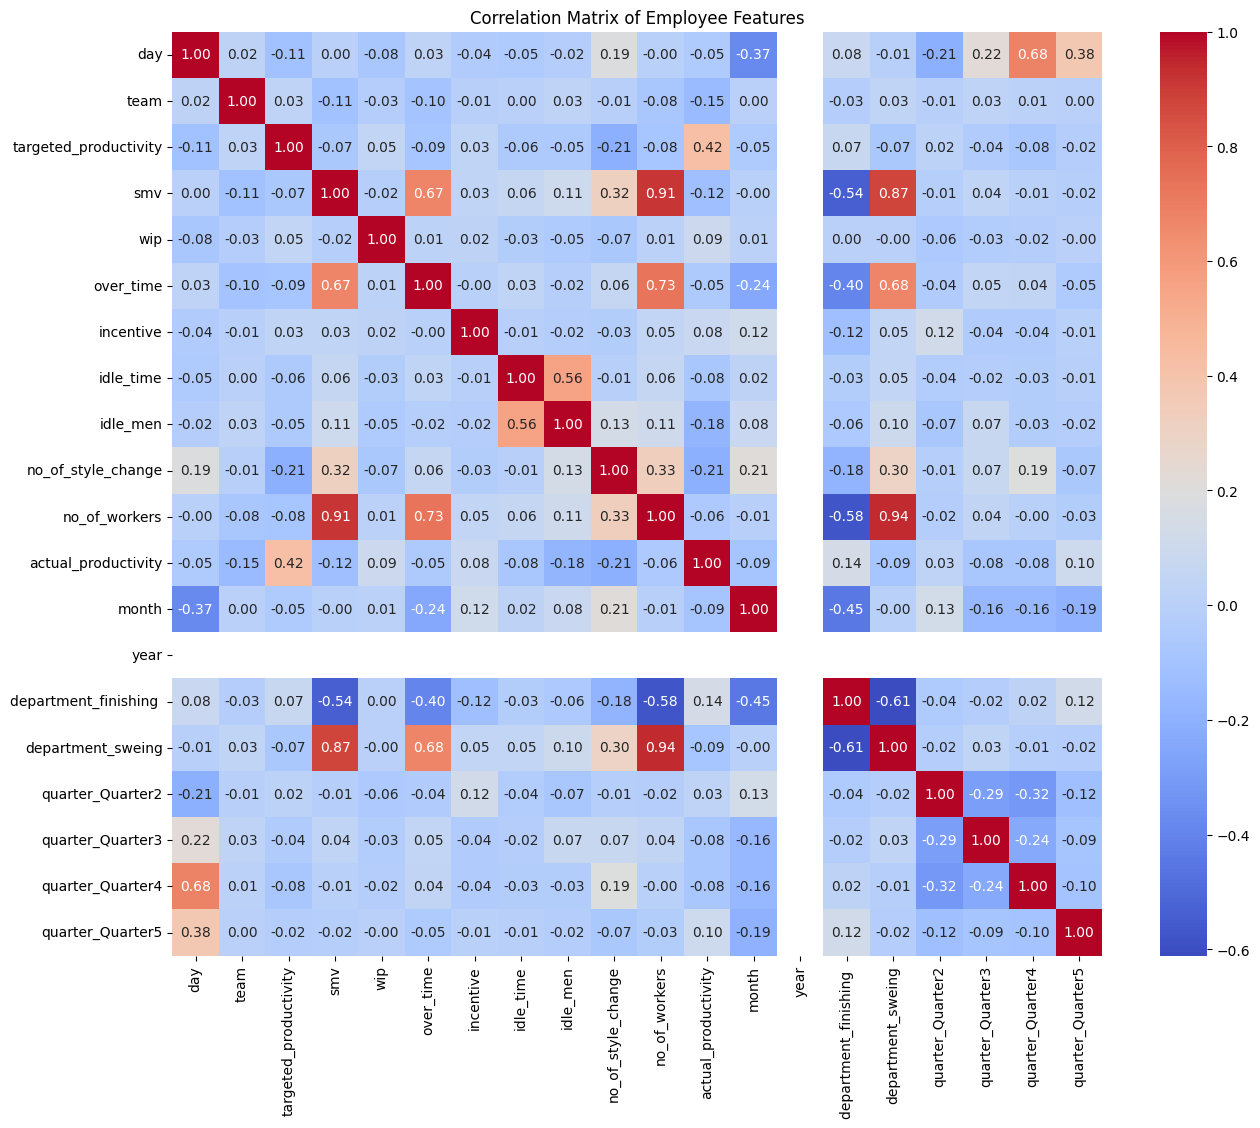

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(15, 12))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Matrix of Employee Features')
plt.show()


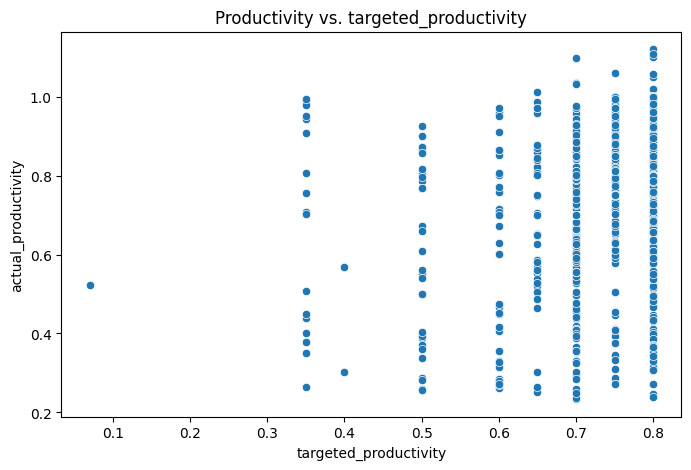

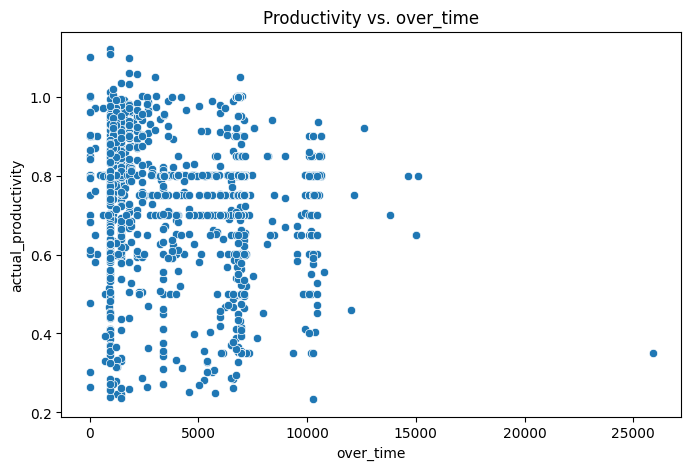

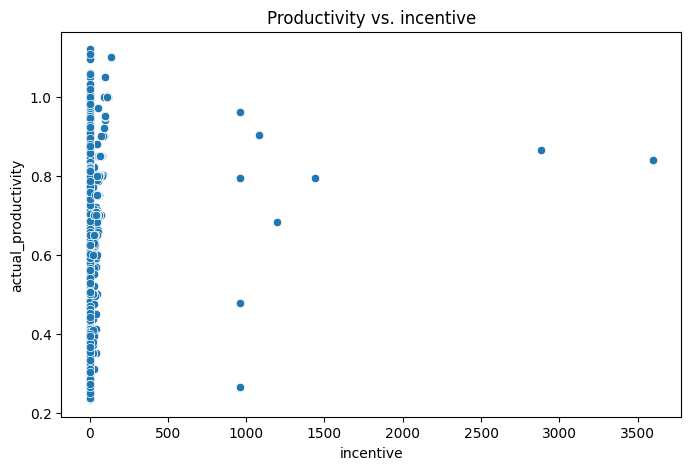

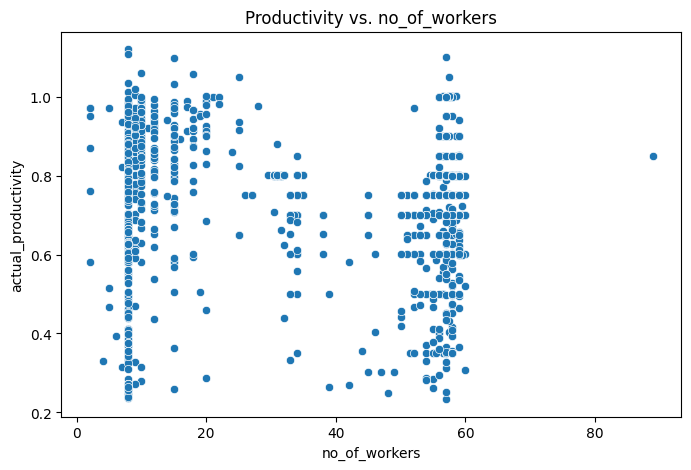

KeyError: 'quarter'

<Figure size 800x500 with 0 Axes>

In [33]:
# Select a few important columns to visualize against productivity
features_to_plot = ['targeted_productivity', 'over_time', 'incentive', 'no_of_workers']

# Create scatterplots
for feature in features_to_plot:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=df[feature], y=df['actual_productivity'])
    plt.title(f'Productivity vs. {feature}')
    plt.show()

# Create boxplots for categorical-like features
categorical_features = ['quarter', 'department']

for feature in categorical_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df[feature], y=df['actual_productivity'])
    plt.title(f'Productivity across different {feature}s')
    plt.show()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [4]:
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [5]:
df.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [6]:
# Convert the 'date' column to a datetime object
df['date'] = pd.to_datetime(df['date'])

# Extract features like day, month, and year
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

# Drop the original 'date' column as we've replaced it
df = df.drop('date', axis=1)

In [7]:
# Fill missing 'wip' values with the mean of the column
# inplace=True modifies the DataFrame directly
df['wip'].fillna(df['wip'].mean(), inplace=True)

# Confirm that there are no more missing values
print(df.isnull().sum())

quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
month                    0
year                     0
dtype: int64


C:\Users\ayush\AppData\Local\Temp\ipykernel_262124\2116763858.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['wip'].fillna(df['wip'].mean(), inplace=True)


In [8]:
# This is the recommended way to fill missing values
df['wip'] = df['wip'].fillna(df['wip'].mean())

In [9]:
# Convert 'department' into numerical columns
df = pd.get_dummies(df, columns=['department'], drop_first=True)

In [10]:
# See the new columns and confirm no missing values
df.info()

# View the first few rows of your fully numerical dataset
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   quarter                1197 non-null   object 
 1   day                    1197 non-null   int32  
 2   team                   1197 non-null   int64  
 3   targeted_productivity  1197 non-null   float64
 4   smv                    1197 non-null   float64
 5   wip                    1197 non-null   float64
 6   over_time              1197 non-null   int64  
 7   incentive              1197 non-null   int64  
 8   idle_time              1197 non-null   float64
 9   idle_men               1197 non-null   int64  
 10  no_of_style_change     1197 non-null   int64  
 11  no_of_workers          1197 non-null   float64
 12  actual_productivity    1197 non-null   float64
 13  month                  1197 non-null   int32  
 14  year                   1197 non-null   int32  
 15  depa

,quarter,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,month,year,department_finishing,department_sweing
0,Quarter1,1,8,0.80,26.16,1108.000000,7080,98,0.0,0,0,59.0,0.940725,1,2015,False,True
1,Quarter1,1,1,0.75,3.94,1190.465991,960,0,0.0,0,0,8.0,0.886500,1,2015,True,False
2,Quarter1,1,11,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5,0.800570,1,2015,False,True
3,Quarter1,1,12,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5,0.800570,1,2015,False,True
4,Quarter1,1,6,0.80,25.90,1170.000000,1920,50,0.0,0,0,56.0,0.800382,1,2015,False,True


In [11]:
# The 'target' is what we want to predict
y = df['actual_productivity']

# The 'features' are all columns except the target
X = df.drop('actual_productivity', axis=1)

In [12]:
from sklearn.model_selection import train_test_split

# Split the data into 80% for training and 20% for testing
# random_state=42 ensures you get the same split every time you run the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (957, 16)
X_test shape: (240, 16)
y_train shape: (957,)
y_test shape: (240,)


In [14]:
from sklearn.linear_model import LinearRegression

# Create an instance of the model
lr_model = LinearRegression()

# Train the model on your training data
lr_model.fit(X_train, y_train)

ValueError: could not convert string to float: 'Quarter2'

In [15]:
# This will print the names of any columns that still contain text
print(df.select_dtypes(include=['object']).columns)


Index(['quarter'], dtype='object')


In [16]:
# This will convert both 'quarter' and 'department' into numerical columns
df = pd.get_dummies(df, columns=['quarter', 'department'], drop_first=True)

KeyError: "['department'] not in index"

In [17]:
print(df.columns)

Index(['quarter', 'day', 'team', 'targeted_productivity', 'smv', 'wip',
       'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change',
       'no_of_workers', 'actual_productivity', 'month', 'year',
       'department_finishing ', 'department_sweing'],
      dtype='object')


In [18]:
# Only include the 'quarter' column, which we know is a text column
df = pd.get_dummies(df, columns=['quarter'], drop_first=True)

In [19]:
y = df['actual_productivity']
X = df.drop('actual_productivity', axis=1)

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
from sklearn.linear_model import LinearRegression

# Create and train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

print("Model trained successfully!")

Model trained successfully!


In [22]:
from sklearn.metrics import mean_absolute_error, r2_score

# Make predictions on the test data
predictions = lr_model.predict(X_test)

# Check the performance
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean Absolute Error: 0.10725581350934071
R-squared: 0.20067436652570225


In [23]:
from sklearn.ensemble import RandomForestRegressor

# Create and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [24]:
# Make predictions with the Random Forest model
rf_predictions = rf_model.predict(X_test)

# Check the performance
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print("--- Random Forest Performance ---")
print(f"Mean Absolute Error: {rf_mae}")
print(f"R-squared: {rf_r2}")

--- Random Forest Performance ---
Mean Absolute Error: 0.06870445178849999
R-squared: 0.5569683175265558


In [25]:
from xgboost import XGBRegressor

# Create and train the XGBoost model
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [26]:
# Make predictions with the XGBoost model
xgb_predictions = xgb_model.predict(X_test)

# Check the performance
xgb_mae = mean_absolute_error(y_test, xgb_predictions)
xgb_r2 = r2_score(y_test, xgb_predictions)

print("--- XGBoost Performance ---")
print(f"Mean Absolute Error: {xgb_mae}")
print(f"R-squared: {xgb_r2}")

--- XGBoost Performance ---
Mean Absolute Error: 0.07636419454825649
R-squared: 0.4252835221317429


In [27]:
import pickle

# The 'rf_model' is the variable holding your trained Random Forest
# 'wb' means 'write binary' mode
with open('model_rf.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

print("Random Forest model saved successfully as model_rf.pkl")

Random Forest model saved successfully as model_rf.pkl


In [28]:
print(X_train.columns.tolist())

['day', 'team', 'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers', 'month', 'year', 'department_finishing ', 'department_sweing', 'quarter_Quarter2', 'quarter_Quarter3', 'quarter_Quarter4', 'quarter_Quarter5']


In [29]:
print(X_train.columns.tolist())

['day', 'team', 'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers', 'month', 'year', 'department_finishing ', 'department_sweing', 'quarter_Quarter2', 'quarter_Quarter3', 'quarter_Quarter4', 'quarter_Quarter5']


In [30]:
import pickle

# Save the list of column names to a file
with open('model_columns.pkl', 'wb') as file:
    pickle.dump(X_train.columns, file)

print("Model columns saved successfully to model_columns.pkl!")


Model columns saved successfully to model_columns.pkl!
